## Types of Missing Values

MCAR (Missing Completely At Random): If there is no relationship between the missingness of the data and any values (observed or those values which are actually missing), then this is MCAR.

Missing at Random (MAR): If there is a relationship between the missingness and the observed values, then it is MAR. For example — Men are more likely to tell you their weight than Women, So if the column 'Weight' has missing values, then this is MAR. Specifically, the missingness in 'Weight' depends upon the observed values of variable ‘Gender’, i.e., male or female

 Missing Not at Random MNAR: If MCAR and MAR are not detected, then the missingness is an example of MNAR. It basically implies a strong relationship between the missingness of the data and the observed values and values which are actually missing. It can also be detected if 2 or more columns have the same missing value pattern

### Loading Data and using missingno

#### Press Ctrl + Enter in each cell below to show the result

To get missingno module of Python (in cell below): 
1) Go to file + new launcher + terminal 

2) On terminal type: pip install missingno

3) Once installation is complete, close terminal window and Restart Kernel of this window (Round Arrow Sign at top)

In [60]:
#importing the basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import missingno as mano
%matplotlib inline

In [61]:
#read the CSV file
missingdf = pd.read_csv("Missing.Value.Data.csv")

In [62]:
#we remove missings first. Let's see how many missings we have
missingdf.isnull().sum()

S.No              0
Customer.ID       1
Customer.Name     2
Customer.Age      4
Date              0
Product.Bought    3
Quantity          6
Sales             7
dtype: int64

<AxesSubplot:>

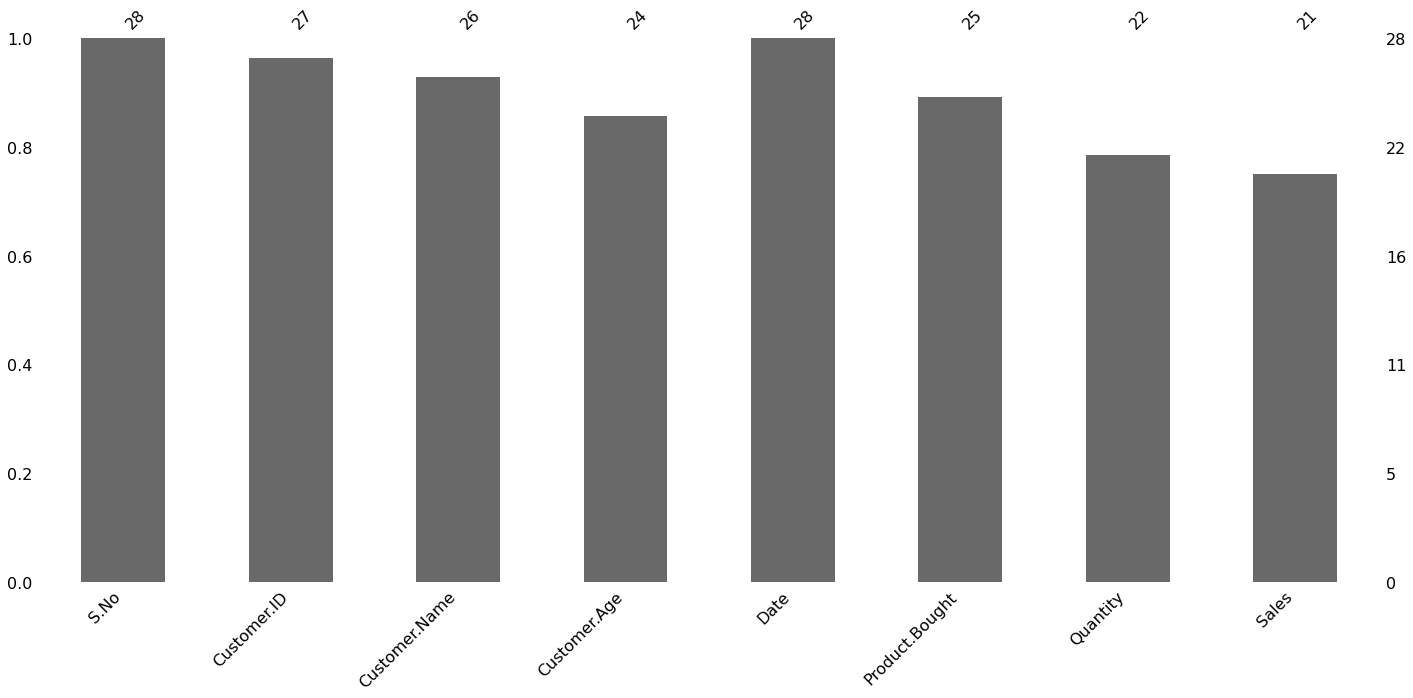

In [63]:
#see the completeness of the data using mano.bar
mano.bar(missingdf)

<AxesSubplot:>

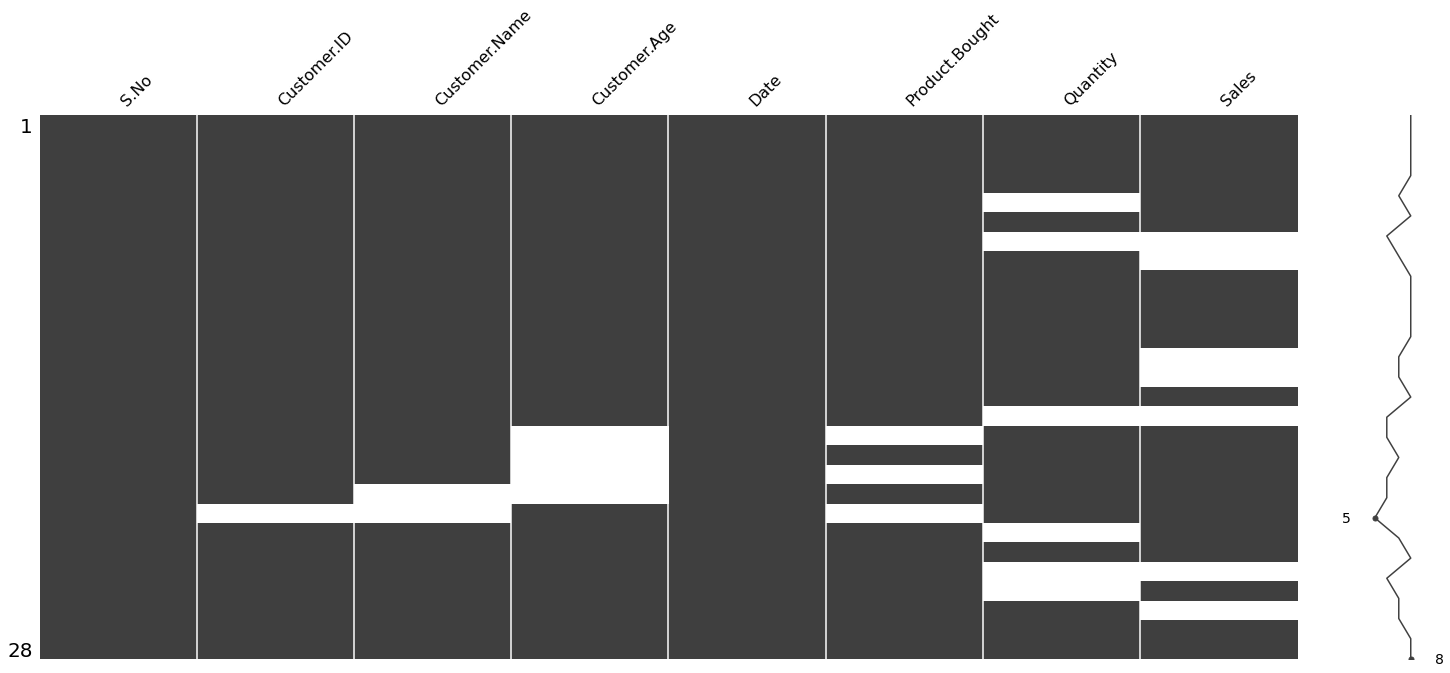

In [64]:
# visualize the location of the missingness of data using mano.matrix
mano.matrix(missingdf)

We can see above that none of the columns have exactly similar missing value patterns. So, none of them is an example of MNAR

If there is no relation between missingness of any 2 or more variables, and also there is no relation between the missing values of one variable and the observed values of another variable, then this is MCAR.

If there is a systematic relationship between the missingness and the observed values, then it is MAR. 

To determine the above, we need to plot some more charts

<AxesSubplot:>

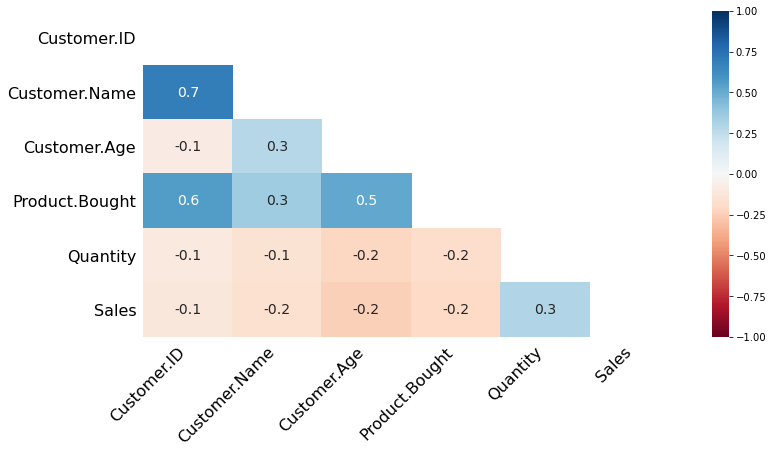

In [65]:
#plot the heatmap to determine the relationship (correlation) between missingness of columns
mano.heatmap(missingdf, figsize=(12,6))

From the above we can see that a missingness in any column is related (or correlated) with missingness of at least one other column. So, all are examples of MAR

<AxesSubplot:>

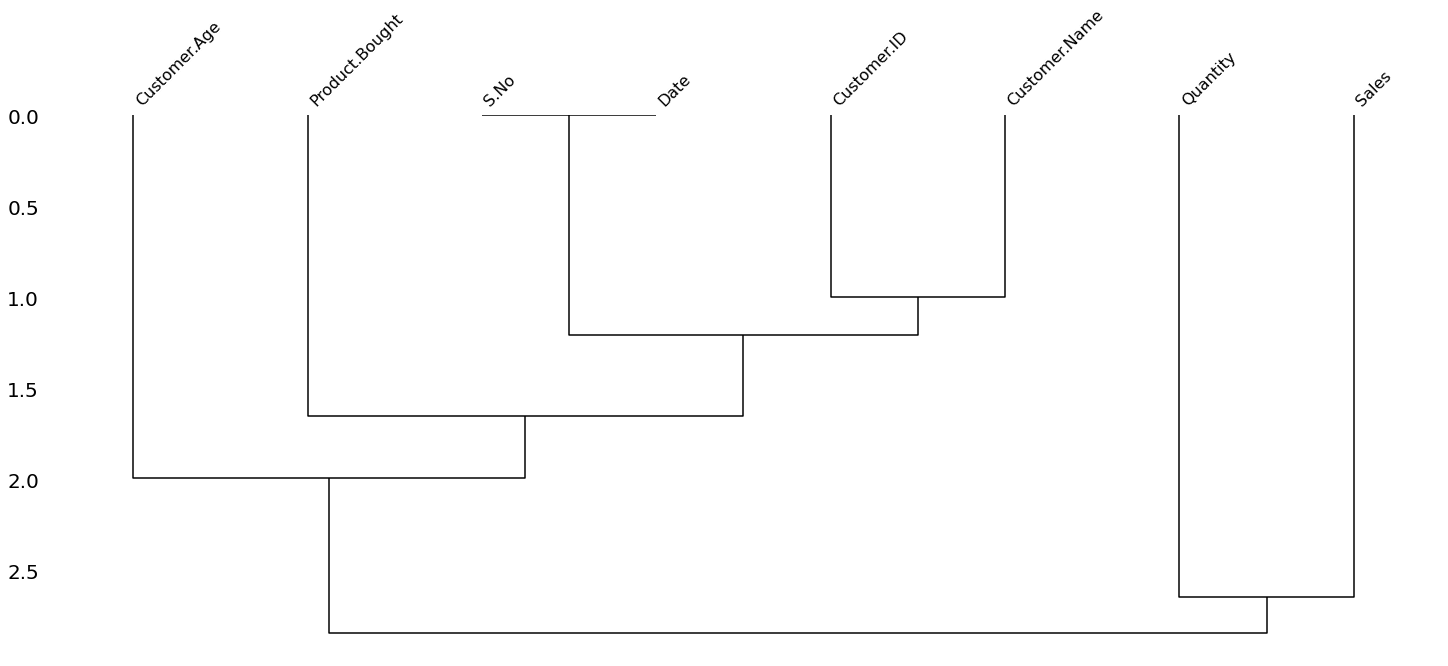

In [66]:
#dendogram will quantify and cluster the missingness
mano.dendrogram(missingdf)

From the above, we can see that S.No and Date are combined with a straight line, i.e., they do not contain any missing values. For all the remaining, there is a correlation so that further confirms MAR

## Handling Missing Values

### Dropping Entire Rows

If the missing values are not that much (just a few rows), we can drop them. However, this is done for MCAR, which we have not been able to prove from the above diagrams

Still, we show the dropping functionality below for an example

In [67]:
#drops all the missing values from the dataframe
missingdf = missingdf.dropna(axis=0)

In [68]:
#check
missingdf.isnull().sum()

S.No              0
Customer.ID       0
Customer.Name     0
Customer.Age      0
Date              0
Product.Bought    0
Quantity          0
Sales             0
dtype: int64

In [69]:
#read the CSV file again
missingdf = pd.read_csv("Missing.Value.Data.csv")

In [70]:
#if you want to delete rows for one of the specified variable, say Customer.Name
missingdf = missingdf.dropna(axis=0, subset=['Customer.Name'])

In [71]:
#check
missingdf.isnull().sum()

S.No              0
Customer.ID       0
Customer.Name     0
Customer.Age      3
Date              0
Product.Bought    2
Quantity          6
Sales             7
dtype: int64

In [72]:
#shape has also changed because the 2 rows of Customer.Name missing values have been deleted
missingdf.shape

(26, 8)

### Imputation

Now we discuss imputation. We can impute through mean, median and mode

In [73]:
from sklearn.impute import SimpleImputer

#create a separate data frame for mean imputation
missingdf_mean = missingdf.copy(deep=True)

mean_imputation = SimpleImputer(strategy='mean')

#take only columns where mean imputation matters, i.e., numerical columns
missingdf_mean[['Customer.Age','Sales','Quantity']] = mean_imputation.fit_transform(missingdf_mean[['Customer.Age','Sales','Quantity']])

In [74]:
#So in the above cell we duplicated missingdf into missingdf_mean and in the columns of CustomerAge, Sales and Quantity, the 
#NaN values were imputed as shown in output cell number 147 

In [75]:
missingdf

,S.No,Customer.ID,Customer.Name,Customer.Age,Date,Product.Bought,Quantity,Sales
0,1,100.0,Ahmed,23.0,12/10/2019,Water Bottle,2.0,945.0
1,2,101.0,Ahmed,23.0,13/10/2019,Power Switch,1.0,324.0
2,3,102.0,Saim,16.0,14/10/2019,Fridge,1.0,45000.0
3,4,103.0,Farhan,34.0,15/10/2019,Mobile,1.0,33000.0
4,5,104.0,Imran,45.0,16/10/2019,Table,NaN,17900.0
5,6,105.0,Farrukh,56.0,17/10/2019,Stickers,2.0,24.0
6,7,106.0,Bismah,33.0,18/10/2019,Stickers,NaN,NaN
7,8,107.0,Ayesha,31.0,19/10/2019,Water Bottle,1.0,NaN
8,9,108.0,Areeba,27.0,20/10/2019,Milk,2.0,453.0
9,10,109.0,Hashir,78.0,21/10/2019,Milk,2.0,433.0


In [76]:
missingdf_mean

,S.No,Customer.ID,Customer.Name,Customer.Age,Date,Product.Bought,Quantity,Sales
0,1,100.0,Ahmed,23.000000,12/10/2019,Water Bottle,2.0,945.000000
1,2,101.0,Ahmed,23.000000,13/10/2019,Power Switch,1.0,324.000000
2,3,102.0,Saim,16.000000,14/10/2019,Fridge,1.0,45000.000000
3,4,103.0,Farhan,34.000000,15/10/2019,Mobile,1.0,33000.000000
4,5,104.0,Imran,45.000000,16/10/2019,Table,1.8,17900.000000
5,6,105.0,Farrukh,56.000000,17/10/2019,Stickers,2.0,24.000000
6,7,106.0,Bismah,33.000000,18/10/2019,Stickers,1.8,10075.842105
7,8,107.0,Ayesha,31.000000,19/10/2019,Water Bottle,1.0,10075.842105
8,9,108.0,Areeba,27.000000,20/10/2019,Milk,2.0,453.000000
9,10,109.0,Hashir,78.000000,21/10/2019,Milk,2.0,433.000000


In [77]:
#check
missingdf_mean.isnull().sum()

S.No              0
Customer.ID       0
Customer.Name     0
Customer.Age      0
Date              0
Product.Bought    2
Quantity          0
Sales             0
dtype: int64

In [78]:
#With missing Customer name and ID being filled by programmers discretion, 
#the only column that remains unfilled in the products bought

We now plot to see whether the distribution remains the same after the missing values have been filled in

<AxesSubplot:xlabel='Sales', ylabel='Quantity'>

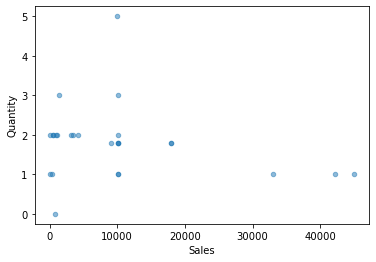

In [79]:
#comparing sales vs quantity (values filled in by mean)
missingdf_mean.plot(x='Sales',y='Quantity',kind='scatter',alpha=0.5,cmap='rainbow')

In [80]:
#the new dataframe is now plotted with sales and quantity as the parameters without any missing values,
#this adds more information to the data frame then with missing values

In [81]:
#now, lets determine those rows where values of either sales or quantity went missing
nulls =  missingdf['Sales'].isnull() | missingdf['Quantity'].isnull()
nulls

0     False
1     False
2     False
3     False
4      True
5     False
6      True
7      True
8     False
9     False
10    False
11    False
12     True
13     True
14    False
15     True
16    False
17    False
18    False
21     True
22    False
23     True
24     True
25     True
26    False
27    False
dtype: bool

<AxesSubplot:xlabel='Sales', ylabel='Quantity'>

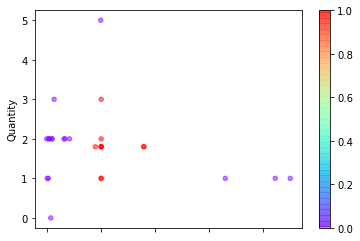

In [82]:
#Now, lets plot them together
missingdf_mean.plot(x='Sales',y='Quantity',kind='scatter',alpha=0.5,c=nulls,cmap='rainbow')

In [ ]:
#After finding out the missing sales and quantity values in the rows we will plot a graph that will compare 
#missingdf and missingdf_mean to figure out the new values obtained after imputation

From the above, we can conclude that values have been filled in according to the given distribution because the purple marks are following the same pattern as the red ones

<AxesSubplot:xlabel='Sales', ylabel='Customer.Age'>

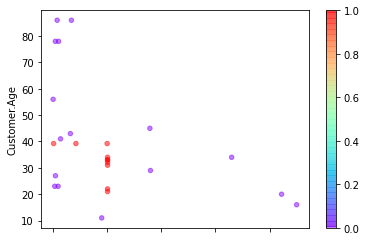

In [83]:
nulls =  missingdf['Sales'].isnull() | missingdf['Customer.Age'].isnull()
missingdf_mean.plot(x='Sales',y='Customer.Age',kind='scatter',alpha=0.5,c=nulls,cmap='rainbow')

In [ ]:
#After finding out the missing sales and Customer Age values in the rows we will plot a graph that will compare 
#missingdf and missingdf_mean to figure out the new values obtained after imputation

### K-NN Based Imputation

In [88]:
#read the CSV file again
missingdf = pd.read_csv("Missing.Value.Data.csv")

In [96]:
from sklearn.impute import KNNImputer
imputer = KNNImputer (n_neighbors=2)
missingdf_knn = missingdf.copy(deep=True)
missingdf_knn[['Customer.Age','Sales','Quantity']] = imputer.fit_transform(missingdf_knn[['Customer.Age','Sales','Quantity']])
missingdf_knn

,S.No,Customer.ID,Customer.Name,Customer.Age,Date,Product.Bought,Quantity,Sales
0,1,100.0,Ahmed,23.0,12/10/2019,Water Bottle,2.0,945.0
1,2,101.0,Ahmed,23.0,13/10/2019,Power Switch,1.0,324.0
2,3,102.0,Saim,16.0,14/10/2019,Fridge,1.0,45000.0
3,4,103.0,Farhan,34.0,15/10/2019,Mobile,1.0,33000.0
4,5,104.0,Imran,45.0,16/10/2019,Table,1.0,17900.0
5,6,105.0,Farrukh,56.0,17/10/2019,Stickers,2.0,24.0
6,7,106.0,Bismah,33.0,18/10/2019,Stickers,1.0,25500.0
7,8,107.0,Ayesha,31.0,19/10/2019,Water Bottle,1.0,2171.5
8,9,108.0,Areeba,27.0,20/10/2019,Milk,2.0,453.0
9,10,109.0,Hashir,78.0,21/10/2019,Milk,2.0,433.0


In [ ]:
#KNN Imputer is a little better compared to simple imputer since it is learning from its neighbours,
#however the values are still a bit off as you see in 24th row a mobile is being sold in 2.5 quantity which is impossible

<AxesSubplot:xlabel='Sales', ylabel='Quantity'>

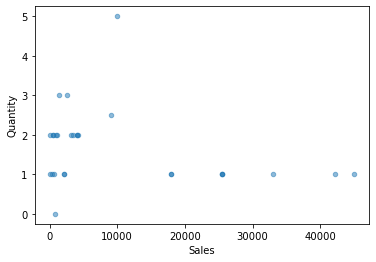

In [90]:
#comparing sales vs quantity (values filled in by knn)
missingdf_knn.plot(x='Sales',y='Quantity',kind='scatter',alpha=0.5,cmap='rainbow')

<AxesSubplot:xlabel='Sales', ylabel='Quantity'>

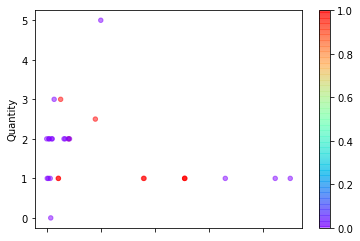

In [91]:
nulls =  missingdf['Sales'].isnull() | missingdf['Quantity'].isnull()
missingdf_knn.plot(x='Sales',y='Quantity',kind='scatter',alpha=0.5,c=nulls,cmap='rainbow')

In [ ]:
#here again we can see the comparsion of data frame with missing values and knn imputed dataframe,
#the red dots show us the new insertions in sales and quantity in the new knn imputed dataframe

You can see from above that the gray dots are again following the same pattern of red dots so the filling up of missing values seems ok